In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!python -m spacy download es_core_news_md
!python -m spacy link es_core_news_md es

     |████████████████████████████████| 73.4MB 1.2MB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.1.0-cp36-none-any.whl size=74602272 sha256=f13b4574014a05e5e3ac868ba476ae0c3363c644a3514af352e647a6136d5c74
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4si0d_x/wheels/20/f7/6b/7a1ba56f009b05386d123ea088b56635594a046acd5cfdd2a2
Successfully built es-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_md -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import DictVectorizer
import spacy
from scipy.sparse import csr_matrix

nlp = spacy.load('es', vectors=False, entity=False)

In [0]:
def load_data():
    """Carga una parte distinta del corpus."""
    with open('/content/drive/My Drive/Clustering Notebooks/wikicorpusesp/spanishText_480000_485000', "r", encoding="utf8", errors='ignore') as file:
        while True:
            texto = ''
            for n in range(0,15000):
                texto += file.readline()
            if not texto:
                break # se cargó todo el texto
            yield texto

load = load_data()
load.__next__


def limpieza(linea):
    """ Sólo se dejan los tokens que son palabras y números"""
    
    newline = []
    for tok in linea:
        if str(tok).isalpha() or str(tok).isdigit() or str(tok)=='.':
            newline.append(tok)
                
    return newline


def get_conll(oraciones):
    """Toma como entrada una lista de listas, donde cada lista es una oración con palabras procesadas con spacy."""
    # lista de palabras, lemmas, categorías sintácticas y dependencias
    toks = []
    toks_lemma = []
    toks_pos = []
    toks_dep = []
    
    for sent in oraciones:
        for word in sent:
            toks.append(word)
            toks_lemma.append(word.lemma_)
            toks_pos.append(word.pos_)
            toks_dep.append(word.dep_)
    
    """Se terminan de limpiar los tokens (Tener en cuenta que se van a usar los lemas)
    * Todo se pasa a minúscula
    * Los números se pasan a dígito"""
    lemas = []
    for w in toks_lemma:
        if w.isdigit():
            lemas.append('dígito')
        else :
            lemas.append(w.lower())
    
    conll = pd.DataFrame({'Word':toks , 'Lemma':lemas , 'Pos':toks_pos , 'Dep':toks_dep})
    return conll

In [0]:
Conll = pd.DataFrame(columns=['Word','Lemma','Pos','Dep'])

for i in range(0,5):
    texto = next(load)
    
    doc = nlp(texto)
    # Separo en oraciones. lista de strings
    oraciones = [sent for sent in doc.sents]
    # Limpio las oraciones. lista de tokens. cada lista es una oración.
    oraciones = [limpieza(sent) for sent in oraciones]
    # Se eliminan las oraciones con menos de 5 tokens
    oraciones = [sent for sent in oraciones if len(sent)>4]
    
    wanalysis = get_conll(oraciones)
    Conll = pd.concat([Conll, wanalysis])

In [7]:
Conll.head(20)

,Word,Lemma,Pos,Dep
0,doc,doc,NOUN,compound
1,Ibievi,ibievi,PROPN,flat
2,Vedad,vedad,PROPN,flat
3,Ibievi,ibievi,PROPN,flat
4,nacido,nacer,ADJ,amod
5,el,el,DET,det
6,6,dígito,NUM,obl
7,de,de,ADP,case
8,agosto,agostar,NOUN,compound
9,de,de,ADP,case


### Graficamos el conteo de palabras




In [0]:
import collections

lemas = list(Conll.Lemma)
frecs = collections.Counter(lemas)

In [9]:
Conteo = pd.DataFrame.from_dict(dict(frecs), orient='index')
Conteo = Conteo.sort_values(by=0, ascending=False)
Conteo = Conteo.reset_index().rename(columns={'index':'Palabras', 0:'Frecuencias'})
Conteo.head(10)

,Palabras,Frecuencias
0,de,48423
1,lo,28552
2,.,27396
3,dígito,21475
4,en,20577
5,el,19607
6,y,15899
7,uno,10722
8,a,10550
9,ser,9967


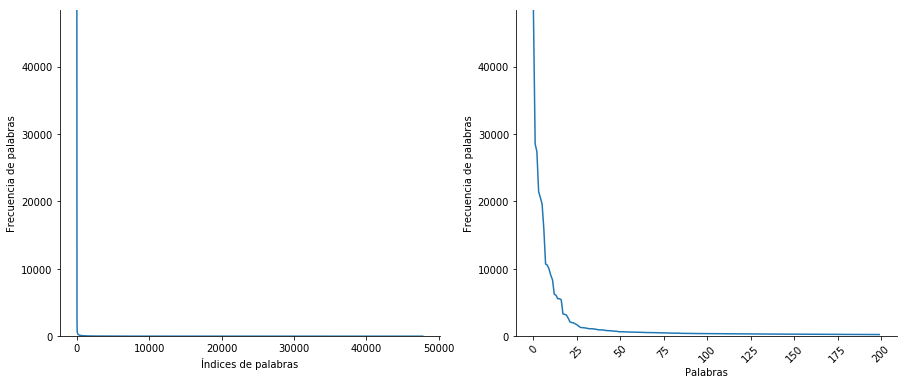

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.lineplot(data=Conteo, x=np.array(Conteo.index), y='Frecuencias')
plt.ylabel('Frecuencia de palabras')
plt.xlabel('Índices de palabras')
plt.ylim(0, Conteo.Frecuencias.max())

plt.subplot(1,2,2)
sns.lineplot(data=Conteo[:200], x=np.array(Conteo[:200].index), y='Frecuencias')
#sns.barplot(data=Conteo[:100], x='Palabras', y='Frecuencias')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia de palabras')
plt.xlabel('Palabras')
plt.ylim(0, Conteo.Frecuencias.max())

sns.despine()

__Se eliminan las palabras con poca frecuencia (ruido) y las stop words. Luego se vuelve a graficar__

In [0]:
# Se marcan las palabras con una frecuencia menor a 50
ruido = list(Conteo[Conteo.Frecuencias<50]['Palabras'])

In [0]:
# STOP WORDS
stopspanish = stopwords.words('spanish')

In [0]:
# uso el cuerpo de lemas, eliminando las palabras que no aparecen suficientes veces y stopwords
corpus_clean = [w for w in lemas if not (w in ruido or w in stopspanish)] 

In [17]:
corpus_clean[:20]

['doc',
 'nacer',
 'dígito',
 'agostar',
 'dígito',
 'actual',
 'ser',
 'futbolista',
 'jugar',
 'comer',
 'delantero',
 'dígito',
 'alemania',
 '.',
 'consecuencia',
 'guerra',
 'familia',
 'abandonar',
 'mano',
 'ser']

In [0]:
import pickle

def guardar(datos):
    with open("corpus_clean.pkl", "wb") as f:
        pickle.dump(datos, f)
        
guardar(corpus_clean)

In [0]:
def cargar():
     with open("corpus_clean.pkl", "rb") as f:
        return pickle.load(f)
      
corpus_clean = cargar()

### Diccionario con co-ocurrencias de palabras y Matriz de co-ocurrencias

In [20]:
corpus_clean = ' '.join(corpus_clean) # un texto en un string
sent = [i.strip(' .') for i in sent_tokenize(corpus_clean, language='spanish') if len(word_tokenize(i))>2]
sent[:10]

['doc nacer dígito agostar dígito actual ser futbolista jugar comer delantero dígito alemania',
 'consecuencia guerra familia abandonar mano ser comenz jugar ftbol',
 'familia abandonar dígito parir jug comer fc dígito',
 'embargar familia despus slo diez mesar parir san luis unidos',
 'all jug equipar universidad san luis milisegundo ftbol pas',
 'ser nombrar ao',
 'unidos ser paris saint dígito francia dígito',
 'disponer minuto jugar dígito dígito dígito gol temporada',
 'mayar dígito dígito aos dígito julio dígito club alemn dígito',
 'comenz formar campaa dígito dígito haber conseguir dígito gol primero dígito campeonato']

In [0]:
def dict_cooc_gen(sentences,w):
    """Toma como entrada una lista de strings, cada string es una oración.
        Devuelve una lista de diccionarios con las coocurrencias y una lista de palabras para los indices de la matriz. 
        Ventana tamaño variable. (w palabras a izq y w palabras a der)"""
    
    cooc = [] # lista de diccionarios
    idx = [] # lista de palabras
    for sen in sentences:
        sent = list(word_tokenize(sen, language='spanish'))
        for m,tok in enumerate(sent):
            
            vecinos = []
            # vecinos a la derecha
            for l in range(1,w+1):
                if m+l > len(sent)-1:
                    break
                else:
                    vecinos.append(sent[m+l])
            # vecinos a la izquierda
            for l in range(1,w+1):
                if m-l < 0:
                    break
                else:
                    vecinos.append(sent[m-l])
            
            
            # para agregar los vecinos de una nueva palabra
            if tok in idx:
                i = idx.index(tok)
                cooc[i][tok] +=1
            else :
                cooc.append({tok:1}) 
                idx.append(tok)
                i = idx.index(tok)

            for v in vecinos:
                if not v in cooc[i]:
                    cooc[i][v] =1
                else:
                    cooc[i][v] +=1
                        

    return cooc, idx

In [0]:
coocurrencias, idx = dict_cooc_gen(sent,2)

In [0]:
# Se obtiene la matriz de coocurrencias
vectorizer = DictVectorizer()
vec = vectorizer.fit_transform(coocurrencias)
# Se muestra en un dataframe
columnas=vectorizer.get_feature_names()
matriz = pd.DataFrame(vec.toarray(), columns=columnas)
matriz = matriz.set_axis(idx,axis=0, inplace=False)

In [25]:
matriz.head(10)

,abandonar,abril,abrir,acabar,academia,acceso,accin,accionar,acordar,actividad,actor,actriz,actual,actualidad,actualmente,adems,administracin,adquirir,aeropuerto,agostar,aguar,ahora,aire,aires,ala,alberto,alcalde,alcanzar,alemania,alemn,alemán,alfonso,alguno,alihuat,all,allen,alrededor,alto,altura,ambos,...,verdadero,verde,versin,vertical,vestir,vez,viajar,victoria,vida,video,viejo,villa,visitar,vivienda,vivir,volar,volumen,volver,von,voz,vuelta,wagner,was,washington,web,william,wilson,with,world,x,xito,xix,xs,xvi,xviii,xx,york,you,zona,﻿1
doc,0.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,11.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,3.0,2.0,7.0,0.0,0.0,2.0,5.0,1.0,2.0,0.0,2.0,2.0,3.0,5.0,8.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,6.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,4.0,0.0,6.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0
nacer,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dígito,14.0,373.0,35.0,11.0,14.0,8.0,9.0,10.0,16.0,17.0,40.0,40.0,46.0,13.0,38.0,24.0,9.0,22.0,3.0,333.0,22.0,25.0,11.0,48.0,11.0,15.0,26.0,41.0,27.0,19.0,13.0,21.0,33.0,5.0,36.0,20.0,42.0,44.0,42.0,13.0,...,6.0,15.0,56.0,8.0,11.0,129.0,21.0,44.0,57.0,27.0,12.0,7.0,4.0,15.0,38.0,10.0,28.0,35.0,33.0,63.0,64.0,41.0,6.0,32.0,14.0,38.0,11.0,44.0,49.0,77.0,21.0,4.0,85.0,1.0,5.0,12.0,71.0,26.0,42.0,98.0
agostar,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
actual,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,244.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
ser,15.0,41.0,16.0,11.0,12.0,13.0,8.0,9.0,13.0,19.0,62.0,49.0,80.0,22.0,59.0,64.0,10.0,19.0,7.0,29.0,26.0,25.0,8.0,14.0,10.0,11.0,26.0,17.0,12.0,24.0,14.0,10.0,69.0,10.0,15.0,14.0,16.0,58.0,11.0,27.0,...,23.0,19.0,41.0,6.0,21.0,79.0,7.0,25.0,38.0,17.0,14.0,15.0,6.0,0.0,50.0,9.0,16.0,19.0,3.0,13.0,3.0,3.0,0.0,6.0,19.0,7.0,4.0,2.0,8.0,8.0,26.0,8.0,0.0,7.0,11.0,5.0,12.0,10.0,32.0,118.0
futbolista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jugar,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,0.0,2.0,4.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0
comer,0.0,5.0,5.0,2.0,2.0,3.0,5.0,1.0,2.0,22.0,24.0,16.0,8.0,6.0,19.0,22.0,7.0,3.0,1.0,0.0,12.0,8.0,5.0,4.0,4.0,2.0,12.0,5.0,5.0,4.0,2.0,3.0,45.0,0.0,8.0,1.0,1.0,13.0,2.0,10.0,...,10.0,4.0,3.0,1.0,15.0,26.0,6.0,4.0,12.0,9.0,3.0,4.0,1.0,3.0,7.0,4.0,3.0,7.0,2.0,9.0,0.0,1.0,1.0,3.0,2.0,2.0,3.0,5.0,3.0,1.0,12.0,3.0,0.0,1.0,6.0,2.0,13.0,2.0,13.0,29.0
delantero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,

### PPMI para transformar la matriz

In [0]:
def ppmi_sparse(sparsa):
    """ donde el valor en la matriz es distinto de 0 calculo log(obs/esp)
        obs>esp  -> log(obs/esp)
        obs<esp  -> 0 """
    SumFilas = sparsa.sum(axis=1)
    SumCols = sparsa.sum(axis=0)
    total= SumFilas.sum()
    
    rows, cols = csr_matrix(sparsa).nonzero()
    ppmi_sparsa = []
    for i in range(0,len(rows)):
        esp = float(SumFilas[rows[i]]*SumCols[cols[i]])/total
        if sparsa.iloc[rows[i]][cols[i]] > esp:
            ppmi_sparsa.append(round(math.log10(float(sparsa.iloc[rows[i]][cols[i]])/esp),3) )
        else :
            ppmi_sparsa.append(round(0,3))
                
    ppmi = pd.DataFrame(csr_matrix((ppmi_sparsa, (rows, cols)), shape=sparsa.shape).toarray(),
                        columns=sparsa.columns, index=sparsa.index )
    
    return ppmi


In [0]:
infomutua= ppmi_sparse(matriz)

In [0]:
def guardar_infomutua(datos):
    with open("infomutua.pkl", "wb") as f:
        pickle.dump(datos, f)


def cargar_infomutua():
     with open("infomutua.pkl", "rb") as f:
        return pickle.load(f)

guardar_infomutua(infomutua)

In [0]:
infomutua = cargar_infomutua()

### LSA para reducir dimensionalidad

With SVD(Singular value decomposition) to this matrix to reduce the number of features from ~10000 to around 100 to 300 features which will condense all the important features into small vector space.

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
svd = TruncatedSVD(n_components=400, n_iter=8, random_state=123)
matriz_reducida = svd.fit_transform(infomutua.values) 

In [40]:
svd.explained_variance_ratio_[:400].sum()

0.8118381944831887

In [42]:
matred = pd.DataFrame(matriz_reducida, index=matriz.index )
matred.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
doc,1.493942,1.820983,0.835728,-0.857223,0.135239,-0.224540,-0.180542,-0.502209,-0.190041,-0.648828,-0.292948,-0.151479,-0.069211,-0.760797,0.055718,0.476548,0.247876,0.453405,-0.509651,0.476239,-0.377182,0.211493,0.184920,-0.388192,0.116524,0.346362,-0.163661,-0.240412,0.339483,0.241529,0.150627,-0.192972,-0.069417,0.041536,0.000043,-0.123655,0.241129,-0.003963,-0.169535,0.124152,...,-0.176188,-0.025000,0.043964,0.256450,-0.181420,0.121248,0.318834,-0.116294,0.391626,-0.043048,-0.167987,0.016116,-0.147991,0.026544,-0.238070,-0.165605,-0.131444,0.041435,0.060379,-0.079090,-0.078881,-0.217655,-0.232673,0.179749,-0.085115,-0.001271,-0.037884,0.222594,0.303219,-0.091980,-0.088444,-0.045120,0.009713,0.235325,0.057116,0.148605,-0.058057,0.128079,-0.122046,-0.067755
nacer,2.760950,2.371432,0.991622,-0.769502,0.097830,-0.118564,-0.351523,-1.028584,0.057218,-0.819133,-0.658004,0.318634,-0.069774,-0.319965,-0.286255,0.856533,0.643967,0.322947,-0.492517,1.001484,-0.875588,-0.357651,0.593232,-0.295691,0.412195,-0.117800,-0.503083,-0.530616,0.038993,0.187161,-0.953631,-1.158220,-0.573083,-0.424515,0.101463,-0.186296,-0.061720,-0.237257,-0.321598,0.313348,...,0.047662,0.185170,-0.196941,-0.022849,0.012521,0.001063,0.151578,0.187362,0.320125,0.341969,0.221938,-0.052548,0.431350,-0.125506,0.359494,-0.292926,0.306921,-0.096333,-0.119539,0.353262,0.080258,-0.412133,0.189960,0.111770,-0.258267,0.201341,0.224767,-0.411721,0.108361,-0.039736,-0.113903,0.022261,0.119290,-0.217655,-0.125292,-0.007517,0.304739,0.027881,-0.396495,-0.232387
dígito,0.547581,0.454495,-0.173218,-0.329519,0.428321,0.450224,-0.146796,0.042358,-0.185307,0.395576,0.213540,-0.226237,-0.097427,0.247158,0.013820,0.387571,-0.029474,0.222376,0.158309,0.201043,0.051110,0.049009,0.042042,-0.302059,-0.084382,-0.011157,0.126471,-0.479267,0.202194,0.259864,-0.060655,-0.460577,-0.212799,-0.169210,0.154270,0.087449,0.184198,-0.147641,-0.143756,-0.008548,...,-0.270679,0.090048,-0.140160,-0.060250,0.099707,0.173154,-0.051495,-0.171944,-0.075230,0.144917,-0.093710,-0.095702,-0.128881,-0.010319,0.034778,-0.083458,-0.073185,-0.048870,-0.008477,-0.088328,-0.016090,0.172113,0.038561,0.103643,0.078928,0.015324,-0.054095,-0.125823,-0.065274,-0.106719,0.009212,0.133033,-0.072865,-0.115267,0.046027,0.046112,0.179182,-0.071732,-0.017964,-0.054296
agostar,1.909522,0.808207,0.483480,0.422549,0.264726,0.545123,-0.177663,-0.604803,-0.579962,0.601721,-0.341271,0.227760,-0.440252,0.075675,0.074601,0.394996,-0.315132,-0.318255,0.024955,0.179772,-0.419466,-0.064967,-0.026017,-0.333980,-0.231207,-0.309920,0.190532,-0.465652,0.365378,0.040629,0.095216,-0.750462,-0.507342,0.054595,0.368303,-0.160837,-0.223235,-0.334926,-0.283419,0.185565,...,0.281778,0.081059,0.277251,0.008179,0.179855,-0.000348,0.323978,-0.222369,-0.028038,0.221552,-0.046728,0.257372,0.051297,-0.211142,-0.201349,-0.086710,0.016059,0.398965,0.210422,0.147944,-0.095126,0.236591,-0.069123,0.003378,0.083545,-0.019931,0.008387,0.157360,0.043226,-0.080463,-0.288524,-0.480334,0.052728,-0.070965,-0.303526,0.196244,0.280828,0.253124,0.038170,-0.220660
actual,3.489087,0.510352,1.653181,-0.639726,-0.725203,0.402868,0.262555,0.628899,-0.341609,1.082993,0.144461,0.194848,0.075756,-0.582368,0.426559,-0.917011,0.923589,0.739780,-1.101149,-0.301138,-0.987037,0.240426,-0.234235,-0.166388,-0.057176,-0.292901,-0.289718,0.379364,-0.208551,-0.705794,-0.097564,-0.235392,-0.170402,0.509988,0.246591,-0.226405,0.292002,0.589747,-0.376646,0.268158,...,0.166124,0.067504,-0.175471,0.490860,0.042094,0.234546,-0.096609,-0.312245,-0.565038,0.052417,0.234463,0.147743,-0.477413,-0.041479,-0.285686,0.126994,-0.095401,-0.305280,0.331287,0.346052,0.303724,0.407965,-0.520931,-0.055444,-0.033275,-0.044066,0.0

In [0]:
def guardar_lsa(datos):
    with open("lsa00.pkl", "wb") as f:
        pickle.dump(datos, f)


def cargar_lsa():
     with open("lsa00.pkl", "rb") as f:
        return pickle.load(f)

guardar_lsa(matred)

In [0]:
matred = cargar_lsa()
matriz_reducida = matred.values

### t-sne para Visualizar

In [0]:
from sklearn.manifold import TSNE

In [0]:
viz = TSNE(n_components=2, metric='euclidean', init='pca', random_state=0 )
t_sne = viz.fit_transform(matriz_reducida)


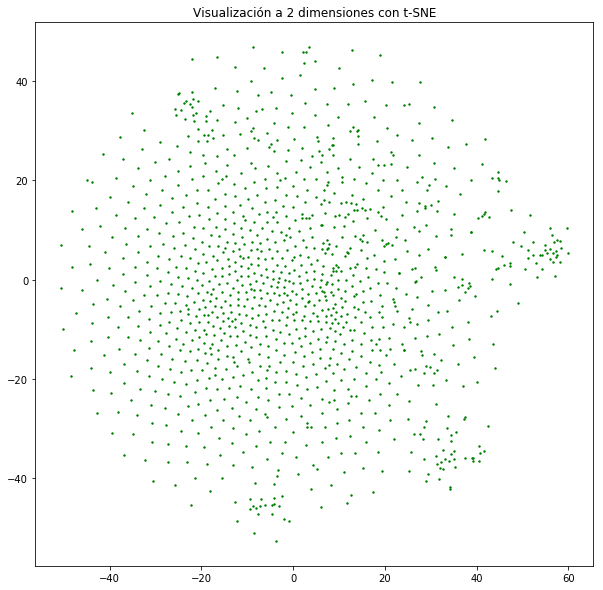

In [47]:
plt.figure(figsize=(10,10)) 

plt.scatter(t_sne[:, 0], t_sne[:, 1], s=2, c='g')
plt.title("Visualización a 2 dimensiones con t-SNE")
plt.axis('tight')

plt.show()

### Clustering sobre la matriz reducida con LSA

#### Kmeans

In [0]:
from sklearn.cluster import KMeans 

In [0]:
km = KMeans(n_clusters=10, random_state=123).fit(matriz_reducida)

labels = km.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

clusters = pd.DataFrame({'Palabras':matred.index, 'Etiqueta':labels})

In [50]:
clusters.groupby('Etiqueta').count()

,Palabras
Etiqueta,
0,95
1,66
2,125
3,2
4,194
5,114
6,507
7,47
8,44


In [51]:
for i in range(0,n_clusters):
    print('Cluster ', i, ': ', list(clusters[clusters.Etiqueta==i].Palabras),'\n')

Cluster  0 :  ['nacer', 'futbolista', 'san', 'luis', 'universidad', 'paz', 'mara', 'lpez', 'garca', 'eduardo', 'manuel', 'fernando', 'carlos', 'francisco', 'gobierno', 'hijo', 'ii', 'espaol', 'buenos', 'aires', 'poltico', 'argentino', 'repblica', 'partido', 'secretario', 'presidente', 'ex', 'ministro', 'argentina', 'justicia', 'rey', 'real', 'iii', 'v', 'gonzlez', 'barcelona', 'juan', 'naci', 'santa', 'fe', 'jos', 'don', 'hermanar', 'jorge', 'jess', 'venezuela', 'maria', 'fernndez', 'rafael', 'primer', 'felipe', 'presidencia', 'alberto', 'prez', 'nicols', 'cruz', 'honor', 'colombiano', 'santiago', 'santo', 'espaa', 'miguel', 'pablo', 'antonio', 'madrid', 'duque', 'martnez', 'uribe', 'alcalde', 'gobernador', 'seor', 'mexicano', 'snchez', 'crdoba', 'sevilla', 'blanca', 'pedro', 'conde', 'rodrguez', 'x', 'martn', 'casa', 'valencia', 'colegio', 'obispo', 'iv', 'pintor', 'alfonso', 'rosario', 'junta', 'periodista', 'marqus', 'avenida', 'guerrillero', 'eln'] 

Cluster  1 :  ['disponer', 'sob

In [0]:
km = KMeans(n_clusters=50, random_state=123).fit(matriz_reducida)

labels = km.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

clusters = pd.DataFrame({'Palabras':matred.index, 'Etiqueta':labels})

In [53]:
clusters.groupby('Etiqueta').count()

,Palabras
Etiqueta,
0,1
1,170
2,30
3,1
4,56
5,4
6,5
7,89
8,118


In [54]:
for i in range(0,n_clusters):
    print('Cluster ', i, ': ', list(clusters[clusters.Etiqueta==i].Palabras),'\n')

Cluster  0 :  ['recordar'] 

Cluster  1 :  ['doc', 'dígito', 'ser', 'fc', 'milisegundo', 'pas', 'nombrar', 'paris', 'saint', 'minuto', 'aos', 'primero', 'encontrar', 'tambin', 'per', 'dar', 'trmino', 'referirse', 'cuyo', 'londres', 'du', 'franco', 'vez', 'partir', 'ciudad', 'girar', 'form', 'siguiente', 'entrar', 'antiguar', 'ocupar', 'paso', 'edad', 'escultura', 'c', 'estacin', 'menor', 'as', 'red', 'fe', 'visitar', 'tardar', 'largar', 'habitante', 'ingresar', 'comercial', 'reinar', 'transportar', 'mencionar', 'origen', 'conflicto', 'romano', 'continuacin', 'orar', 'vase', 'isbn', 'responsable', 'mayor', 'recorrer', 'alto', 'poblacin', 'distrito', 'promediar', 'municipal', 'ayuntamiento', 'vivienda', 'mil', 'estacionar', 'total', 'ms', 'declarar', 'unir', 'vehculos', 'hospital', 'hora', 'servicio', 'comprender', 'reemplazar', 'hoy', 'clase', 'industriar', 'ltimos', 'empez', 'centro', 'tour', 'semana', 'conducir', 'estadio', 'india', 'fase', 'originalmente', 'polica', 'international', 

In [0]:
km = KMeans(n_clusters=100, random_state=123).fit(matriz_reducida)

labels = km.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

clusters = pd.DataFrame({'Palabras':matred.index, 'Etiqueta':labels})

In [56]:
for i in range(0,n_clusters):
    print('Cluster ', i, ': ', list(clusters[clusters.Etiqueta==i].Palabras),'\n')

Cluster  0 :  ['campar'] 

Cluster  1 :  ['at', 'text', 's', 'jaguar', 'fontsize', 'xs'] 

Cluster  2 :  ['tradicional', 'arte', 'diverso', 'maestro', 'japn', 'estilar', 'moderno', 'influenciar', 'perodo', 'obrar', 'religioso', 'pintor', 'pintura'] 

Cluster  3 :  ['luis', 'manuel', 'fernndez', 'pablo', 'martnez'] 

Cluster  4 :  ['school', 'cd', 'dr', 'mundi', 'deller', 'lp', 'harmonia'] 

Cluster  5 :  ['paz', 'gobierno', 'gobernar', 'colombia', 'colombiano', 'uribe', 'guerrillero', 'eln'] 

Cluster  6 :  ['sobrar', 'teora', 'derecho', 'particular', 'actividad', 'polticas', 'social', 'autor', 'libro', 'ley', 'trabajo', 'relacionar', 'vida', 'establecer', 'pblico', 'contener', 'basar', 'texto', 'tratar', 'cursar', 'europeo', 'religin', 'mencionar', 'importante', 'cultura', 'elemento', 'movimiento', 'librar', 'historia', 'dedicar', 'amplio', 'poltica', 'diferente', 'recurso', 'seccin', 'constituir', 'declarar', 'desarrollar', 'humano', 'artculos', 'cultural', 'artculo', 'informacin', '